## Examining the Incidence of Cancer by County Demographics
### By Scott Milinder
#### The merging of State Cancer Profiles from the National Cancer Institutes and the Center for Disease Control with demographic datasets from the United States Department of Agriculture results in a multidimenional view of cancer incidence at the level of U.S. states and counties. The comprehensive county-level cancer data  includes age-adjusted indicent rates for all cancer types. This dataset is merged with demographic features in the categories of population, birth and death rates, education attainment, employment, and poverty levels.
#### This project is intended as an exploration of these datasets, to spotlight  noteworthy observations, and to highlight specific analytic techniques. The US has about 3000 counties, so I saw no possibility of a machine learning application to emerge from these demographic and cancer datasets.  My hope was that interesting observations and associations would emerge and suggest new paths of further inquiring with more granular data, such as by using individual cancer incidence or by examining more granular demographic categories and cancer types.
#### This project employs the OSEMN framework for the data science development process.  The phases in this framework follow this sequence but sometimes we must iterate as we find new information, especially as we explore the data and new requirements arise. We do this in an agile way as possible.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

### Obtain Data
#### Read raw data from NCI/CDC and USDA downloads

In [2]:
USER_PATH = "C:\\Users\\Scott\\OneDrive\\Documents"
DATA_PATH = "Datasets\\Cancer"
print(os.path.join(USER_PATH, DATA_PATH))

C:\Users\Scott\OneDrive\Documents\Datasets\Cancer


In [3]:
cbc_path = os.path.join(USER_PATH, DATA_PATH, 'incd.csv')
print(cbc_path)

C:\Users\Scott\OneDrive\Documents\Datasets\Cancer\incd.csv


In [4]:
## Read Cancer By County data
## The recent trend includes years 2012-2016. Exclude problematic columns with little potential value or that are redundant.
cbcdata = pd.read_csv(cbc_path, skiprows=8, usecols=[0,1,3,6,7,8], encoding="unicode_escape")

In [5]:
cbcdata.head(5)

,State,FIPS,"Age-Adjusted Incidence Rate() - cases per 100,000",Average Annual Count,Recent Trend,Recent 5-Year Trend () in Incidence Rates
0,"US (SEER+NPCR)(1,10)",0.0,448,1638110,falling,-0 .9
1,"Union County, Florida(6,10)",12125.0,1135,208,falling,-4.6
2,"Logan County, Nebraska(6,10)",31113.0,677.2,7,stable,1.2
3,"Powell County, Kentucky(7,8)",21197.0,646.2,92,stable,1.1
4,"Taylor County, Kentucky(7,8)",21217.0,623.3,196,rising,1.4


In [6]:
# Population Data -- updated census estimates, birth, deaths, migrations, immigration
pop_path = os.path.join(USER_PATH, DATA_PATH, 'PopulationEstimates.csv')
print(pop_path)

C:\Users\Scott\OneDrive\Documents\Datasets\Cancer\PopulationEstimates.csv


In [7]:
# special codes are scattered through the data. These generate a read error; so escaping eliminates error without data loss.
popdata = pd.read_csv(pop_path, encoding="unicode_escape")
popdata.head(5)

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
0,0.0,US,United States,NaN,NaN,NaN,NaN,NaN,"308,745,538","308,758,105",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000.0,AL,Alabama,NaN,NaN,NaN,NaN,NaN,"4,779,736","4,780,138",...,0.4,1.2,0.5,1.2,1.6,0.6,0.6,0.8,1.1,1.9
2,1001.0,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,"54,571","54,574",...,1.1,0.7,6.0,-6.1,-3.9,2.0,-1.9,5.3,1.0,0.6
3,1003.0,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,"182,265","182,264",...,22.0,24.3,16.3,17.6,22.9,20.2,17.9,21.5,22.5,24.8
4,1005.0,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,"27,457","27,457",...,-25.5,-9.1,0.3,-6.8,-8.1,-5.1,-15.5,-18.2,-25.0,-8.6


In [8]:
# Education Data
edu_path = os.path.join(USER_PATH, DATA_PATH, 'Education.csv')
print(edu_path)

C:\Users\Scott\OneDrive\Documents\Datasets\Cancer\Education.csv


In [9]:
edudata = pd.read_csv(edu_path, encoding="unicode_escape")
edudata.head(5)

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",Unnamed: 47
0,0.0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730",...,24.4,"27,437,114","59,093,612","62,853,315","66,887,603",12.7,27.3,29.1,30.9,NaN
1,1000.0,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287",...,19.0,"481,059","1,012,551","979,449","803,578",14.7,30.9,29.9,24.5,NaN
2,1001.0,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,18.0,"4,521","12,363","10,697","9,176",12.3,33.6,29.1,25.0,NaN
3,1003.0,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334",...,23.1,"13,997","39,771","45,286","43,968",9.8,27.8,31.7,30.7,NaN
4,1005.0,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,10.9,"4,960","6,549","4,707","2,218",26.9,35.5,25.5,12.0,NaN


In [10]:
# Employment/ Unemployment Data
unemp_path = os.path.join(USER_PATH, DATA_PATH, 'Unemployment.csv')
print(unemp_path)

C:\Users\Scott\OneDrive\Documents\Datasets\Cancer\Unemployment.csv


In [11]:
# Strip off header text
unempdata = pd.read_csv(unemp_path, encoding="unicode_escape",skipinitialspace=True)
unempdata.head(5)

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,0,US,United States,NaN,NaN,NaN,"152,191,093","145,156,134","7,034,959",4.6,...,"160,273,906","153,293,830","6,980,076",4.4,"161,640,488","155,344,043","6,296,445",3.9,"$60,336",NaN
1,1000,AL,Alabama,NaN,NaN,NaN,"2,175,612","2,089,127","86,485",4.0,...,2178243,2081676,96567,4.4,"2,198,837","2,112,347","86,490",3.9,"$48,193",100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"24,383","23,577",806,3.3,...,25972,24958,1014,3.9,"25,957","25,015",942,3.6,"$58,343",121.1
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,"82,659","80,099","2,560",3.1,...,92090,88342,3748,4.1,"93,849","90,456","3,393",3.6,"$56,607",117.5
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,"10,334","9,684",650,6.3,...,8317,7831,486,5.8,"8,373","7,940",433,5.2,"$32,490",67.4


In [12]:
# Poverty Estimates
pov_path = os.path.join(USER_PATH, DATA_PATH, 'PovertyEstimates.csv')
print(pov_path)

C:\Users\Scott\OneDrive\Documents\Datasets\Cancer\PovertyEstimates.csv


In [13]:
povdata = pd.read_csv(pov_path, encoding="unicode_escape")
povdata.head(5)

,FIPStxt,State,Area_Name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2017,CI90LBAll_2017,CI90UBALL_2017,...,CI90UB517P_2017,MEDHHINC_2017,CI90LBINC_2017,CI90UBINC_2017,POV04_2017,CI90LB04_2017,CI90UB04_2017,PCTPOV04_2017,CI90LB04P_2017,CI90UB04P_2017
0,0,US,United States,NaN,NaN,NaN,NaN,"42,583,651","42,342,619","42,824,683",...,17.5,"60,336","60,250","60,422","3,932,969","3,880,645","3,985,293",20.2,19.9,20.5
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"802,263","784,517","820,009",...,23.8,"48,193","47,451","48,935","78,986","75,009","82,963",27.7,26.3,29.1
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"7,390","6,147","8,633",...,22.1,"58,343","52,121","64,565",NaN,NaN,NaN,NaN,NaN,NaN
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,"21,199","17,444","24,954",...,17.9,"56,607","52,439","60,775",NaN,NaN,NaN,NaN,NaN,NaN
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"7,414","6,325","8,503",...,55.0,"32,490","29,218","35,762",NaN,NaN,NaN,NaN,NaN,NaN


### Scrub Data
#### Remove or transform data that is problematic and stands in the way of exploration or analysis (null/missing, data type errors, redundant, mismatched timeframes, clearly irrelevant, etc.)  Data will be transformed by extraction, merging, linking, and reformulation. The FIPS code will be the common feature that brings together the cancer data with the demographic data at the county level. 
#### The target feature is the cancer incident rate, an age-adjusted five-year rolling average of the incidence of cancer per 100,000 people. The rate include both cases that end in death and cases that are non-fatal.  The rate includes all cancer types.


In [14]:
cbcdata.shape

(3164, 6)

In [15]:
popdata.shape

(3274, 149)

In [16]:
edudata.shape

(3662, 48)

In [17]:
unempdata.shape

(3275, 56)

In [18]:
povdata.shape

(3194, 34)

In [19]:
print(cbcdata.columns)
print(popdata.columns)
print(edudata.columns)
print(unempdata.columns)
print(povdata.columns)

Index(['State', ' FIPS', 'Age-Adjusted Incidence Rate() - cases per 100,000',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend () in Incidence Rates'],
      dtype='object')
Index(['FIPS', 'State', 'Area_Name', 'Rural-urban_Continuum Code_2003',
       'Rural-urban_Continuum Code_2013', 'Urban_Influence_Code_2003',
       'Urban_Influence_Code_2013', 'Economic_typology_2015',
       'CENSUS_2010_POP', 'ESTIMATES_BASE_2010',
       ...
       'R_DOMESTIC_MIG_2017', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2011',
       'R_NET_MIG_2012', 'R_NET_MIG_2013', 'R_NET_MIG_2014', 'R_NET_MIG_2015',
       'R_NET_MIG_2016', 'R_NET_MIG_2017', 'R_NET_MIG_2018'],
      dtype='object', length=149)
Index(['FIPS Code', 'State', 'Area name', '2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code', 'Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 ye

In [20]:
for col in popdata.columns: 
    print(col) 

FIPS
State
Area_Name
Rural-urban_Continuum Code_2003
Rural-urban_Continuum Code_2013
Urban_Influence_Code_2003
Urban_Influence_Code_2013
Economic_typology_2015
CENSUS_2010_POP
ESTIMATES_BASE_2010
POP_ESTIMATE_2010
POP_ESTIMATE_2011
POP_ESTIMATE_2012
POP_ESTIMATE_2013
POP_ESTIMATE_2014
POP_ESTIMATE_2015
POP_ESTIMATE_2016
POP_ESTIMATE_2017
POP_ESTIMATE_2018
N_POP_CHG_2010
N_POP_CHG_2011
N_POP_CHG_2012
N_POP_CHG_2013
N_POP_CHG_2014
N_POP_CHG_2015
N_POP_CHG_2016
N_POP_CHG_2017
N_POP_CHG_2018
Births_2010
Births_2011
Births_2012
Births_2013
Births_2014
Births_2015
Births_2016
Births_2017
Births_2018
Deaths_2010
Deaths_2011
Deaths_2012
Deaths_2013
Deaths_2014
Deaths_2015
Deaths_2016
Deaths_2017
Deaths_2018
NATURAL_INC_2010
NATURAL_INC_2011
NATURAL_INC_2012
NATURAL_INC_2013
NATURAL_INC_2014
NATURAL_INC_2015
NATURAL_INC_2016
NATURAL_INC_2017
NATURAL_INC_2018
INTERNATIONAL_MIG_2010
INTERNATIONAL_MIG_2011
INTERNATIONAL_MIG_2012
INTERNATIONAL_MIG_2013
INTERNATIONAL_MIG_2014
INTERNATIONAL_MIG_2015


In [21]:
# Merge population data with the Cancer by County data on the FIPS code
cbcmerged = cbcdata.merge(popdata, left_on=' FIPS', right_on='FIPS', suffixes=('_fromCBC', '_fromPOP'))

In [22]:
print(cbcmerged)

                                          State_fromCBC     FIPS  \
0                                  US (SEER+NPCR)(1,10)      0.0   
1                           Union County, Florida(6,10)  12125.0   
2                          Logan County, Nebraska(6,10)  31113.0   
3                          Powell County, Kentucky(7,8)  21197.0   
4                          Taylor County, Kentucky(7,8)  21217.0   
5                       Robertson County, Kentucky(7,8)  21201.0   
6                        Nicholas County, Kentucky(7,8)  21181.0   
7                         Blaine County, Nebraska(6,10)  31009.0   
8                  Kingsbury County, South Dakota(6,10)  46077.0   
9                          Estill County, Kentucky(7,8)  21065.0   
10                        Carroll County, Kentucky(7,8)  21041.0   
11                  Golden Valley County, Montana(6,10)  30037.0   
12                        Thomas County, Nebraska(6,10)  31171.0   
13                       Sherman County, Nebrask

In [23]:
for col in cbcmerged.columns: 
    print(col) 

State_fromCBC
 FIPS
Age-Adjusted Incidence Rate() - cases per 100,000
Average Annual Count
Recent Trend
Recent 5-Year Trend () in Incidence Rates
FIPS
State_fromPOP
Area_Name
Rural-urban_Continuum Code_2003
Rural-urban_Continuum Code_2013
Urban_Influence_Code_2003
Urban_Influence_Code_2013
Economic_typology_2015
CENSUS_2010_POP
ESTIMATES_BASE_2010
POP_ESTIMATE_2010
POP_ESTIMATE_2011
POP_ESTIMATE_2012
POP_ESTIMATE_2013
POP_ESTIMATE_2014
POP_ESTIMATE_2015
POP_ESTIMATE_2016
POP_ESTIMATE_2017
POP_ESTIMATE_2018
N_POP_CHG_2010
N_POP_CHG_2011
N_POP_CHG_2012
N_POP_CHG_2013
N_POP_CHG_2014
N_POP_CHG_2015
N_POP_CHG_2016
N_POP_CHG_2017
N_POP_CHG_2018
Births_2010
Births_2011
Births_2012
Births_2013
Births_2014
Births_2015
Births_2016
Births_2017
Births_2018
Deaths_2010
Deaths_2011
Deaths_2012
Deaths_2013
Deaths_2014
Deaths_2015
Deaths_2016
Deaths_2017
Deaths_2018
NATURAL_INC_2010
NATURAL_INC_2011
NATURAL_INC_2012
NATURAL_INC_2013
NATURAL_INC_2014
NATURAL_INC_2015
NATURAL_INC_2016
NATURAL_INC_2017

In [24]:
cbcmerged.shape

(3158, 155)

In [25]:
# Merge education data with the Cancer by County data on the FIPS code
cbcmerged = cbcmerged.merge(edudata, left_on=' FIPS', right_on='FIPS Code', suffixes=('_fromPOP', '_fromEDU'))

In [26]:
print(cbcmerged.head())

                  State_fromCBC     FIPS  \
0          US (SEER+NPCR)(1,10)      0.0   
1   Union County, Florida(6,10)  12125.0   
2  Logan County, Nebraska(6,10)  31113.0   
3  Powell County, Kentucky(7,8)  21197.0   
4  Taylor County, Kentucky(7,8)  21217.0   

  Age-Adjusted Incidence Rate() - cases per 100,000 Average Annual Count  \
0                                               448               1638110   
1                                              1135                   208   
2                                             677.2                     7   
3                                             646.2                    92   
4                                             623.3                   196   

  Recent Trend Recent 5-Year Trend () in Incidence Rates     FIPS  \
0      falling                                     -0 .9       0.0   
1      falling                                      -4.6   12125.0   
2       stable                                       1.2   311

In [27]:
for col in cbcmerged.columns: 
    print(col)

State_fromCBC
 FIPS
Age-Adjusted Incidence Rate() - cases per 100,000
Average Annual Count
Recent Trend
Recent 5-Year Trend () in Incidence Rates
FIPS
State_fromPOP
Area_Name
Rural-urban_Continuum Code_2003
Rural-urban_Continuum Code_2013
Urban_Influence_Code_2003
Urban_Influence_Code_2013
Economic_typology_2015
CENSUS_2010_POP
ESTIMATES_BASE_2010
POP_ESTIMATE_2010
POP_ESTIMATE_2011
POP_ESTIMATE_2012
POP_ESTIMATE_2013
POP_ESTIMATE_2014
POP_ESTIMATE_2015
POP_ESTIMATE_2016
POP_ESTIMATE_2017
POP_ESTIMATE_2018
N_POP_CHG_2010
N_POP_CHG_2011
N_POP_CHG_2012
N_POP_CHG_2013
N_POP_CHG_2014
N_POP_CHG_2015
N_POP_CHG_2016
N_POP_CHG_2017
N_POP_CHG_2018
Births_2010
Births_2011
Births_2012
Births_2013
Births_2014
Births_2015
Births_2016
Births_2017
Births_2018
Deaths_2010
Deaths_2011
Deaths_2012
Deaths_2013
Deaths_2014
Deaths_2015
Deaths_2016
Deaths_2017
Deaths_2018
NATURAL_INC_2010
NATURAL_INC_2011
NATURAL_INC_2012
NATURAL_INC_2013
NATURAL_INC_2014
NATURAL_INC_2015
NATURAL_INC_2016
NATURAL_INC_2017

In [28]:
# Merge Unemployment/Employment data with the Cancer by County data on the FIPS code
cbcmerged = cbcmerged.merge(unempdata, left_on=' FIPS', right_on='FIPS', suffixes=('_fromEDU', '_fromUNEMP'))

In [29]:
for col in cbcmerged.columns: 
    print(col)

State_fromCBC
 FIPS
Age-Adjusted Incidence Rate() - cases per 100,000
Average Annual Count
Recent Trend
Recent 5-Year Trend () in Incidence Rates
FIPS_fromEDU
State_fromPOP
Area_Name
Rural-urban_Continuum Code_2003
Rural-urban_Continuum Code_2013
Urban_Influence_Code_2003
Urban_Influence_Code_2013
Economic_typology_2015
CENSUS_2010_POP
ESTIMATES_BASE_2010
POP_ESTIMATE_2010
POP_ESTIMATE_2011
POP_ESTIMATE_2012
POP_ESTIMATE_2013
POP_ESTIMATE_2014
POP_ESTIMATE_2015
POP_ESTIMATE_2016
POP_ESTIMATE_2017
POP_ESTIMATE_2018
N_POP_CHG_2010
N_POP_CHG_2011
N_POP_CHG_2012
N_POP_CHG_2013
N_POP_CHG_2014
N_POP_CHG_2015
N_POP_CHG_2016
N_POP_CHG_2017
N_POP_CHG_2018
Births_2010
Births_2011
Births_2012
Births_2013
Births_2014
Births_2015
Births_2016
Births_2017
Births_2018
Deaths_2010
Deaths_2011
Deaths_2012
Deaths_2013
Deaths_2014
Deaths_2015
Deaths_2016
Deaths_2017
Deaths_2018
NATURAL_INC_2010
NATURAL_INC_2011
NATURAL_INC_2012
NATURAL_INC_2013
NATURAL_INC_2014
NATURAL_INC_2015
NATURAL_INC_2016
NATURAL_

In [30]:
# Merge Poverty data with the Cancer by County data on the FIPS code.
# FIPStxt for POV
cbcmerged = cbcmerged.merge(povdata, left_on=' FIPS', right_on='FIPStxt', suffixes=('_fromUNEMP', '_fromPOV'))

In [31]:
for col in cbcmerged.columns: 
    print(col)

State_fromCBC
 FIPS
Age-Adjusted Incidence Rate() - cases per 100,000
Average Annual Count
Recent Trend
Recent 5-Year Trend () in Incidence Rates
FIPS_fromEDU
State_fromPOP
Area_Name_fromUNEMP
Rural-urban_Continuum Code_2003
Rural-urban_Continuum Code_2013
Urban_Influence_Code_2003_fromUNEMP
Urban_Influence_Code_2013_fromUNEMP
Economic_typology_2015
CENSUS_2010_POP
ESTIMATES_BASE_2010
POP_ESTIMATE_2010
POP_ESTIMATE_2011
POP_ESTIMATE_2012
POP_ESTIMATE_2013
POP_ESTIMATE_2014
POP_ESTIMATE_2015
POP_ESTIMATE_2016
POP_ESTIMATE_2017
POP_ESTIMATE_2018
N_POP_CHG_2010
N_POP_CHG_2011
N_POP_CHG_2012
N_POP_CHG_2013
N_POP_CHG_2014
N_POP_CHG_2015
N_POP_CHG_2016
N_POP_CHG_2017
N_POP_CHG_2018
Births_2010
Births_2011
Births_2012
Births_2013
Births_2014
Births_2015
Births_2016
Births_2017
Births_2018
Deaths_2010
Deaths_2011
Deaths_2012
Deaths_2013
Deaths_2014
Deaths_2015
Deaths_2016
Deaths_2017
Deaths_2018
NATURAL_INC_2010
NATURAL_INC_2011
NATURAL_INC_2012
NATURAL_INC_2013
NATURAL_INC_2014
NATURAL_INC_

In [32]:
cbcmerged.shape

(3134, 293)

In [33]:
print(cbcmerged.dtypes)

State_fromCBC                                          object
 FIPS                                                 float64
Age-Adjusted Incidence Rate() - cases per 100,000     object
Average Annual Count                                   object
Recent Trend                                           object
Recent 5-Year Trend () in Incidence Rates             object
FIPS_fromEDU                                          float64
State_fromPOP                                          object
Area_Name_fromUNEMP                                    object
Rural-urban_Continuum Code_2003                       float64
Rural-urban_Continuum Code_2013                       float64
Urban_Influence_Code_2003_fromUNEMP                   float64
Urban_Influence_Code_2013_fromUNEMP                   float64
Economic_typology_2015                                float64
CENSUS_2010_POP                                        object
ESTIMATES_BASE_2010                                    object
POP_ESTI

In [34]:
cbc_mapper = {" FIPS":"FIPS",
              "State_fromCBC": "County_State",
              "Age-Adjusted Incidence Rate() - cases per 100,000": "Incident Rate (/100K)",
              "Recent 5-Year Trend () in Incidence Rates": "Recent 5-yr Trend",
              "State_fromPOP": "State",
              "Area_Name_fromUNEMP": "County",
              "Rural-urban_Continuum Code_2013": "Rural-urban Continuum Code",
              "Urban_Influence_Code_2013_fromUNEMP": "Urban Influence Code",
              "Economic_typology_2015": "Economic_typology",
              "POP_ESTIMATE_2012": "Population_2012",
              "POP_ESTIMATE_2013": "Population_2013",
              "POP_ESTIMATE_2014": "Population_2014",
              "POP_ESTIMATE_2015": "Population_2015",
              "POP_ESTIMATE_2016": "Population_2016",
              "N_POP_CHG_2012": "Pop_Chg_2012",
              "N_POP_CHG_2013": "Pop_Chg_2013",
              "N_POP_CHG_2014": "Pop_Chg_2014",
              "N_POP_CHG_2015": "Pop_Chg_2015",
              "N_POP_CHG_2016": "Pop_Chg_2016"                         
             }
cbcmerged.rename(columns=cbc_mapper,inplace=True)

In [35]:
for col in cbcmerged.columns: 
    print(col)

County_State
FIPS
Incident Rate (/100K)
Average Annual Count
Recent Trend
Recent 5-yr Trend
FIPS_fromEDU
State
County
Rural-urban_Continuum Code_2003
Rural-urban Continuum Code
Urban_Influence_Code_2003_fromUNEMP
Urban Influence Code
Economic_typology
CENSUS_2010_POP
ESTIMATES_BASE_2010
POP_ESTIMATE_2010
POP_ESTIMATE_2011
Population_2012
Population_2013
Population_2014
Population_2015
Population_2016
POP_ESTIMATE_2017
POP_ESTIMATE_2018
N_POP_CHG_2010
N_POP_CHG_2011
Pop_Chg_2012
Pop_Chg_2013
Pop_Chg_2014
Pop_Chg_2015
Pop_Chg_2016
N_POP_CHG_2017
N_POP_CHG_2018
Births_2010
Births_2011
Births_2012
Births_2013
Births_2014
Births_2015
Births_2016
Births_2017
Births_2018
Deaths_2010
Deaths_2011
Deaths_2012
Deaths_2013
Deaths_2014
Deaths_2015
Deaths_2016
Deaths_2017
Deaths_2018
NATURAL_INC_2010
NATURAL_INC_2011
NATURAL_INC_2012
NATURAL_INC_2013
NATURAL_INC_2014
NATURAL_INC_2015
NATURAL_INC_2016
NATURAL_INC_2017
NATURAL_INC_2018
INTERNATIONAL_MIG_2010
INTERNATIONAL_MIG_2011
INTERNATIONAL_MIG_20

In [36]:
cbcmerged.shape

(3134, 293)

In [37]:
# Drop problematic or useless columns.
droplist = ["FIPS_fromEDU", "Rural-urban_Continuum Code_2003", "Urban_Influence_Code_2003_fromUNEMP", "POP_ESTIMATE_2017",
            "POP_ESTIMATE_2018","Births_2017", "Births_2018", "Deaths_2017", "Deaths_2018", "NATURAL_INC_2017", "NATURAL_INC_2018",
            "DOMESTIC_MIG_2017", "DOMESTIC_MIG_2018", "NET_MIG_2017", "NET_MIG_2018", "RESIDUAL_2017", "RESIDUAL_2018","GQ_ESTIMATES_2017",
            "GQ_ESTIMATES_2018","R_birth_2017", "R_birth_2018", "R_death_2017", "R_death_2018", "R_NATURAL_INC_2017", "R_NATURAL_INC_2018",
            "R_INTERNATIONAL_MIG_2017", "R_INTERNATIONAL_MIG_2018", "R_DOMESTIC_MIG_2017", "R_DOMESTIC_MIG_2018", "R_NET_MIG_2017",
            "R_NET_MIG_2018", "FIPS Code", "State_fromEDU", "Area name", "2003 Rural-urban Continuum Code", "2003 Urban Influence Code",
            "2013 Rural-urban Continuum Code", "2013 Urban Influence Code", "Less than a high school diploma, 1970",
            "High school diploma only, 1970", "Some college (1-3 years), 1970", "Four years of college or higher, 1970",
            "Percent of adults with less than a high school diploma, 1970", "Percent of adults with a high school diploma only, 1970",
            "Percent of adults completing some college (1-3 years), 1970", "Percent of adults completing four years of college or higher, 1970",
            "Less than a high school diploma, 1980", "High school diploma only, 1980", "Some college (1-3 years), 1980",
            "Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980",
            "Percent of adults with a high school diploma only, 1980", "Percent of adults completing some college (1-3 years), 1980",
            "Percent of adults completing four years of college or higher, 1980", "Less than a high school diploma, 1990",
            "High school diploma only, 1990", "Some college or associate's degree, 1990", "Bachelor's degree or higher, 1990",
            "Percent of adults with less than a high school diploma, 1990", "Percent of adults with a high school diploma only, 1990",
            "Percent of adults completing some college or associate's degree, 1990", "Percent of adults with a bachelor's degree or higher, 1990",
            "Less than a high school diploma, 2000", "High school diploma only, 2000", "Some college or associate's degree, 2000",
            "Bachelor's degree or higher, 2000", "Percent of adults with less than a high school diploma, 2000",
            "Percent of adults with a high school diploma only, 2000",
            "Percent of adults completing some college or associate's degree, 2000",
            "Percent of adults with a bachelor's degree or higher, 2000", "FIPS_fromUNEMP", "State_fromUNEMP",
            "Area_name", "Rural_urban_continuum_code_2013", "Urban_influence_code_2013", "Civilian_labor_force_2017",
            "Employed_2017", "Unemployed_2017", "Unemployment_rate_2017", "Civilian_labor_force_2018", "Employed_2018",
            "Unemployed_2018", "Unemployment_rate_2018", "Median_Household_Income_2017",
            "Med_HH_Income_Percent_of_State_Total_2017", "FIPStxt", "Area_Name_fromPOV","Rural-urban_Continuum_Code_2003",
            "Urban_Influence_Code_2003_fromPOV","Rural-urban_Continuum_Code_2013","Urban_Influence_Code_2013_fromPOV"
           ]
cbcreduced = cbcmerged.drop(columns=droplist, errors='raise')

In [38]:
cbcreduced.shape

(3134, 202)

In [39]:
for col in cbcreduced.columns: 
    print(col)

County_State
FIPS
Incident Rate (/100K)
Average Annual Count
Recent Trend
Recent 5-yr Trend
State
County
Rural-urban Continuum Code
Urban Influence Code
Economic_typology
CENSUS_2010_POP
ESTIMATES_BASE_2010
POP_ESTIMATE_2010
POP_ESTIMATE_2011
Population_2012
Population_2013
Population_2014
Population_2015
Population_2016
N_POP_CHG_2010
N_POP_CHG_2011
Pop_Chg_2012
Pop_Chg_2013
Pop_Chg_2014
Pop_Chg_2015
Pop_Chg_2016
N_POP_CHG_2017
N_POP_CHG_2018
Births_2010
Births_2011
Births_2012
Births_2013
Births_2014
Births_2015
Births_2016
Deaths_2010
Deaths_2011
Deaths_2012
Deaths_2013
Deaths_2014
Deaths_2015
Deaths_2016
NATURAL_INC_2010
NATURAL_INC_2011
NATURAL_INC_2012
NATURAL_INC_2013
NATURAL_INC_2014
NATURAL_INC_2015
NATURAL_INC_2016
INTERNATIONAL_MIG_2010
INTERNATIONAL_MIG_2011
INTERNATIONAL_MIG_2012
INTERNATIONAL_MIG_2013
INTERNATIONAL_MIG_2014
INTERNATIONAL_MIG_2015
INTERNATIONAL_MIG_2016
INTERNATIONAL_MIG_2017
INTERNATIONAL_MIG_2018
DOMESTIC_MIG_2010
DOMESTIC_MIG_2011
DOMESTIC_MIG_2012
DOME

In [40]:
cbcreduced["State"]

,State,State
0,US,US
1,FL,FL
2,NE,NE
3,KY,KY
4,KY,KY
5,KY,KY
6,KY,KY
7,NE,NE
8,SD,SD
9,KY,KY


In [41]:
# Remove duplicate State columns
cbcreduced = cbcreduced.loc[:,~cbcreduced.columns.duplicated()]

In [42]:
cbcreduced.shape

(3134, 201)

In [43]:
cbcreduced["State"]

0       US
1       FL
2       NE
3       KY
4       KY
5       KY
6       KY
7       NE
8       SD
9       KY
10      KY
11      MT
12      NE
13      NE
14      IA
15      AR
16      LA
17      KY
18      KY
19      KY
20      KY
21      GA
22      KY
23      TX
24      MT
25      KY
26      SD
27      KY
28      KY
29      KY
        ..
3104    KS
3105    MN
3106    KS
3107    KS
3108    MN
3109    MN
3110    KS
3111    MN
3112    KS
3113    MN
3114    KS
3115    MN
3116    MN
3117    KS
3118    MN
3119    KS
3120    MN
3121    KS
3122    MN
3123    KS
3124    MN
3125    MN
3126    KS
3127    MN
3128    KS
3129    MN
3130    KS
3131    MN
3132    KS
3133    MN
Name: State, Length: 3134, dtype: object

In [44]:
# cbcreduced.set_index('FIPS',inplace=True)
cbcreduced.sort_values(by=['FIPS']).head(10)

,County_State,FIPS,Incident Rate (/100K),Average Annual Count,Recent Trend,Recent 5-yr Trend,State,County,Rural-urban Continuum Code,Urban Influence Code,...,CI90UB517P_2017,MEDHHINC_2017,CI90LBINC_2017,CI90UBINC_2017,POV04_2017,CI90LB04_2017,CI90UB04_2017,PCTPOV04_2017,CI90LB04P_2017,CI90UB04P_2017
0,"US (SEER+NPCR)(1,10)",0.0,448,1638110,falling,-0 .9,US,United States,NaN,NaN,...,17.5,"60,336","60,250","60,422","3,932,969","3,880,645","3,985,293",20.2,19.9,20.5
534,"Autauga County, Alabama(6,10)",1001.0,495.6,304,stable,-0.2,AL,Autauga County,2.0,2.0,...,22.1,"58,343","52,121","64,565",NaN,NaN,NaN,NaN,NaN,NaN
1693,"Baldwin County, Alabama(6,10)",1003.0,445,1189,stable,-2.0,AL,Baldwin County,3.0,2.0,...,17.9,"56,607","52,439","60,775",NaN,NaN,NaN,NaN,NaN,NaN
1991,"Barbour County, Alabama(6,10)",1005.0,429.8,145,stable,0.6,AL,Barbour County,6.0,6.0,...,55.0,"32,490","29,218","35,762",NaN,NaN,NaN,NaN,NaN,NaN
885,"Bibb County, Alabama(6,10)",1007.0,478.3,128,stable,-0.9,AL,Bibb County,1.0,1.0,...,33.8,"45,795","40,924","50,666",NaN,NaN,NaN,NaN,NaN,NaN
1813,"Blount County, Alabama(6,10)",1009.0,440,317,stable,0.1,AL,Blount County,1.0,1.0,...,22.3,"48,253","43,784","52,722",NaN,NaN,NaN,NaN,NaN,NaN
806,"Bullock County, Alabama(6,10)",1011.0,481.3,60,stable,4.3,AL,Bullock County,6.0,6.0,...,60.4,"29,113","25,929","32,297",NaN,NaN,NaN,NaN,NaN,NaN
2306,"Butler County, Alabama(6,10)",1013.0,409,111,stable,1.6,AL,Butler County,6.0,6.0,...,40.6,"36,842","33,405","40,279",NaN,NaN,NaN,NaN,NaN,NaN
1543,"Calhoun County, Alabama(6,10)",1015.0,450.9,647,stable,-0.2,AL,Calhoun County,3.0,2.0,...,27.5,"45,937","43,419","48,455",NaN,NaN,NaN,NaN,NaN,NaN
200,"Chambers County, Alabama(6,10)",1017.0,522.8,240,stable,-1.5,AL,Chambers County,6.0,5.0,...,38.5,"36,883","33,288","40,478",NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# cbcreduced["Incident Rate (/100K)"].astype('float64',errors='raise')
# '549.2 #  ' will cause a floating point error

In [46]:
cbcreduced.loc[cbcreduced["Incident Rate (/100K)"]=='549.2 #  ', "Incident Rate (/100K)"]

68    549.2 #  
Name: Incident Rate (/100K), dtype: object

In [47]:
# extractFloat(string) returns the first occurance of a whitespace-delimited floating point number. if the string
#    has more than one number, only the first will be returned. If the string does not contain a number, the string 
#    itself will be returned unmodified.

def Extract_Float(string):
    strlist = string.split()
    for str in strlist:
        try:
            float(str)
            return str
        except ValueError:
            pass
    return string


In [48]:
# Scub the Incident Rate -- Extract valid floating point expressions and simplify feature name
# The Incident Rate is a five-year age adjusted rate of the incidence of cancer cases, fatal or non-fatal
cbcreduced["IncidentRate"] = cbcreduced["Incident Rate (/100K)"].apply(Extract_Float)

In [49]:
cbcreduced["IncidentRate"]

0         448
1        1135
2       677.2
3       646.2
4       623.3
5       611.6
6         603
7         598
8       597.8
9       597.4
10      596.8
11      596.4
12      594.4
13      593.5
14      593.2
15      592.7
16      592.1
17      590.7
18      589.8
19      589.5
20      589.5
21      580.8
22      580.6
23      576.4
24        575
25      574.6
26      572.8
27      572.7
28      571.9
29      571.7
        ...  
3104       ¶ 
3105       ¶ 
3106       ¶ 
3107       ¶ 
3108       ¶ 
3109       ¶ 
3110       ¶ 
3111       ¶ 
3112       ¶ 
3113       ¶ 
3114       ¶ 
3115       ¶ 
3116       ¶ 
3117       ¶ 
3118       ¶ 
3119       ¶ 
3120       ¶ 
3121       ¶ 
3122       ¶ 
3123       ¶ 
3124       ¶ 
3125       ¶ 
3126       ¶ 
3127       ¶ 
3128       ¶ 
3129       ¶ 
3130       ¶ 
3131       ¶ 
3132       ¶ 
3133       ¶ 
Name: IncidentRate, Length: 3134, dtype: object

In [50]:
# Change Incident Rate to float, returning same value if it cannot be converted.
cbcreduced["IncidentRate"].astype('float64',errors='ignore')

0         448
1        1135
2       677.2
3       646.2
4       623.3
5       611.6
6         603
7         598
8       597.8
9       597.4
10      596.8
11      596.4
12      594.4
13      593.5
14      593.2
15      592.7
16      592.1
17      590.7
18      589.8
19      589.5
20      589.5
21      580.8
22      580.6
23      576.4
24        575
25      574.6
26      572.8
27      572.7
28      571.9
29      571.7
        ...  
3104       ¶ 
3105       ¶ 
3106       ¶ 
3107       ¶ 
3108       ¶ 
3109       ¶ 
3110       ¶ 
3111       ¶ 
3112       ¶ 
3113       ¶ 
3114       ¶ 
3115       ¶ 
3116       ¶ 
3117       ¶ 
3118       ¶ 
3119       ¶ 
3120       ¶ 
3121       ¶ 
3122       ¶ 
3123       ¶ 
3124       ¶ 
3125       ¶ 
3126       ¶ 
3127       ¶ 
3128       ¶ 
3129       ¶ 
3130       ¶ 
3131       ¶ 
3132       ¶ 
3133       ¶ 
Name: IncidentRate, Length: 3134, dtype: object

In [51]:
# Identify and handle non-float values in Incident Rate
cbcreduced.iloc[2920:3070]["IncidentRate"]

2920      241
2921    237.1
2922    235.3
2923    227.5
2924    218.1
2925    212.6
2926    207.6
2927    194.7
2928    130.1
2929       * 
2930       * 
2931       * 
2932       * 
2933       * 
2934       * 
2935       * 
2936       * 
2937       * 
2938       * 
2939       * 
2940       * 
2941       * 
2942       ¶ 
2943       ¶ 
2944       ¶ 
2945       ¶ 
2946       ¶ 
2947       ¶ 
2948       ¶ 
2949       ¶ 
        ...  
3040       ¶ 
3041       ¶ 
3042       ¶ 
3043       ¶ 
3044       ¶ 
3045       ¶ 
3046       ¶ 
3047       ¶ 
3048       ¶ 
3049       ¶ 
3050       ¶ 
3051       ¶ 
3052       ¶ 
3053       ¶ 
3054       ¶ 
3055       ¶ 
3056       ¶ 
3057       ¶ 
3058       ¶ 
3059       ¶ 
3060       ¶ 
3061       ¶ 
3062       ¶ 
3063       ¶ 
3064       ¶ 
3065       ¶ 
3066       ¶ 
3067       ¶ 
3068       ¶ 
3069       ¶ 
Name: IncidentRate, Length: 150, dtype: object

In [52]:
cbcreduced["IncidentRate"] = pd.to_numeric(cbcreduced["IncidentRate"], errors='coerce')

In [53]:
cbcreduced["IncidentRate"].shape

(3134,)

In [54]:
cbcna = pd.isna(cbcreduced["IncidentRate"])
print(cbcna.head())

0    False
1    False
2    False
3    False
4    False
Name: IncidentRate, dtype: bool


In [55]:
cbcreduced = cbcreduced.drop(cbcreduced[cbcna].index)

In [56]:
cbcreduced.shape

(2929, 202)

### Explore Data
#### Explore the relationships amongst the 202 remaining features, with a focus on their affect on the target vairable Incident Rate.  The Incident Rate is averaged over 5 years, 2012 to 2016.   The intervals of other multi-year features should match this timeframe and transfromed if  needed.


In [57]:
# Descriptive stats for Incident Rate, including quartiles
cbcreduced_stats = cbcreduced["IncidentRate"].describe()
print(cbcreduced_stats)

count    2929.000000
mean      448.500649
std        58.405400
min       130.100000
25%       416.400000
50%       454.400000
75%       485.300000
max      1135.000000
Name: IncidentRate, dtype: float64


In [58]:
# Next, make a function to be applied to each county profile tagging each with the its quartile for the Incident Rate
def classify_by_quartile(ir, dstats):
    if ir <= dstats["25%"]:
        return 4
    elif ir <= dstats["50%"]:
        return 3
    elif ir <= dstats["75%"]:
        return 2
    else:
        return 1


In [59]:
# Create a feature to tag each county record with its Incident Rate 
cbcreduced["IR_quartile"] = cbcreduced["IncidentRate"].apply(classify_by_quartile,dstats=cbcreduced_stats)
cbcreduced["IR_quartile"]

0       3
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
2899    4
2900    4
2901    4
2902    4
2903    4
2904    4
2905    4
2906    4
2907    4
2908    4
2909    4
2910    4
2911    4
2912    4
2913    4
2914    4
2915    4
2916    4
2917    4
2918    4
2919    4
2920    4
2921    4
2922    4
2923    4
2924    4
2925    4
2926    4
2927    4
2928    4
Name: IR_quartile, Length: 2929, dtype: int64

In [60]:
cbcreduced["Percent of adults with less than a high school diploma, 2013-17"]

0       12.7
1       24.1
2        7.5
3       21.1
4       15.8
5       25.3
6       20.6
7        1.1
8        9.3
9       24.0
10      23.5
11       6.8
12       6.1
13       7.4
14       5.6
15      22.9
16      22.6
17      23.4
18      25.1
19      17.4
20      23.3
21      16.3
22      21.1
23      21.9
24       4.3
25      29.9
26       7.6
27      15.4
28      15.6
29      30.7
        ... 
2899    11.2
2900    21.7
2901    18.6
2902    23.9
2903    16.3
2904    34.4
2905    21.4
2906     9.1
2907    28.4
2908    20.1
2909    11.6
2910    25.4
2911     6.1
2912    15.6
2913    14.1
2914    25.7
2915     3.5
2916     4.8
2917    49.0
2918    15.8
2919    11.6
2920     6.6
2921    20.4
2922     1.9
2923     8.8
2924    36.6
2925    25.1
2926    47.5
2927    14.2
2928    16.6
Name: Percent of adults with less than a high school diploma, 2013-17, Length: 2929, dtype: float64

In [61]:
# Rename Education features
tmp_mapper = {"Percent of adults with less than a high school diploma, 2013-17":"Pct_LessHSD",
              "Percent of adults with a high school diploma only, 2013-17":"Pct_HSD",
              "Percent of adults completing some college or associate's degree, 2013-17":"Pct_COLAD",
              "Percent of adults with a bachelor's degree or higher, 2013-17":"Pct_BD"
              }
cbcreduced.rename(columns=tmp_mapper,inplace=True)
print(cbcreduced["Pct_LessHSD"].head(5))
print(cbcreduced["Pct_HSD"].head(5))
print(cbcreduced["Pct_COLAD"].head(5))
print(cbcreduced["Pct_BD"].head(5))

0    12.7
1    24.1
2     7.5
3    21.1
4    15.8
Name: Pct_LessHSD, dtype: float64
0    27.3
1    37.7
2    27.7
3    43.5
4    39.0
Name: Pct_HSD, dtype: float64
0    29.1
1    30.0
2    42.2
3    22.0
4    26.4
Name: Pct_COLAD, dtype: float64
0    30.9
1     8.3
2    22.7
3    13.4
4    18.8
Name: Pct_BD, dtype: float64


In [62]:
IR_quartile_1 = (cbcreduced["IR_quartile"]==1)
print(IR_quartile_1.head(5))
IR_quartile_2 = (cbcreduced["IR_quartile"]==2)
print(IR_quartile_2.head(5))
IR_quartile_3 = (cbcreduced["IR_quartile"]==3)
print(IR_quartile_3.head(5))
IR_quartile_4 = (cbcreduced["IR_quartile"]==4)
print(IR_quartile_4.head(5))

0    False
1     True
2     True
3     True
4     True
Name: IR_quartile, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: IR_quartile, dtype: bool
0     True
1    False
2    False
3    False
4    False
Name: IR_quartile, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: IR_quartile, dtype: bool


In [63]:
# means and medians for the education-related attributes
IR_ave = cbcreduced.loc[:,["IR_quartile","Pct_LessHSD","Pct_HSD","Pct_COLAD","Pct_BD"]].agg(['mean','median'],axis=0)
print(IR_ave)

        IR_quartile  Pct_LessHSD    Pct_HSD  Pct_COLAD     Pct_BD
mean       2.500854    14.085797  34.563127  30.246023  21.106862
median     3.000000    12.900000  35.000000  30.200000  18.800000


In [64]:
# means and medians for the ed-related attributes by quartile
IR_ave_quartile = cbcreduced.loc[:,["IR_quartile","Pct_LessHSD","Pct_HSD","Pct_COLAD","Pct_BD"]].groupby(by="IR_quartile").agg(['mean','median'],axis=0)
print(IR_ave_quartile)

            Pct_LessHSD           Pct_HSD         Pct_COLAD            Pct_BD  \
                   mean median       mean median       mean median       mean   
IR_quartile                                                                     
1             14.481532   13.2  36.745280   37.0  29.501915   29.3  19.272914   
2             13.140109   12.2  34.838745   35.0  30.114870   30.1  21.909004   
3             13.549180   12.5  34.275410   34.9  30.444262   30.4  21.735656   
4             15.172715   13.7  32.398636   32.7  30.921282   31.2  21.505730   

                    
            median  
IR_quartile         
1             17.8  
2             19.7  
3             18.7  
4             19.0  


In [65]:
# validation
IR_q1_ave = cbcreduced.loc[IR_quartile_1,["Pct_LessHSD","Pct_HSD","Pct_COLAD","Pct_BD"]].agg(['mean','median'],axis=0)
# IR_q4_ave = cbcreduced.loc[IR_quartile_1,["Pct_LessHSD","Pct_HSD","Pct_COLAD","Pct_BD"]].median()
# IR_q3_ave = cbcreduced.loc[IR_quartile_2,["Pct_LessHSD","Pct_HSD","Pct_COLAD","Pct_BD"]].mean()
# IR_q2_ave = cbcreduced.loc[IR_quartile_2,["Pct_LessHSD","Pct_HSD","Pct_COLAD","Pct_BD"]].median()
print(IR_q1_ave)
# print(IR_q2_mean)

        Pct_LessHSD   Pct_HSD  Pct_COLAD     Pct_BD
mean      14.481532  36.74528  29.501915  19.272914
median    13.200000  37.00000  29.300000  17.800000


In [66]:
print(IR_ave.shape)
print(IR_ave_quartile.shape)

(2, 5)
(4, 8)


In [67]:
print(IR_ave.loc['mean',:])

IR_quartile     2.500854
Pct_LessHSD    14.085797
Pct_HSD        34.563127
Pct_COLAD      30.246023
Pct_BD         21.106862
Name: mean, dtype: float64


In [68]:
IR_ave_quartile

Pct_LessHSD           Pct_HSD         Pct_COLAD            Pct_BD  \
                   mean median       mean median       mean median       mean   
IR_quartile                                                                     
1             14.481532   13.2  36.745280   37.0  29.501915   29.3  19.272914   
2             13.140109   12.2  34.838745   35.0  30.114870   30.1  21.909004   
3             13.549180   12.5  34.275410   34.9  30.444262   30.4  21.735656   
4             15.172715   13.7  32.398636   32.7  30.921282   31.2  21.505730   

                    
            median  
IR_quartile         
1             17.8  
2             19.7  
3             18.7  
4             19.0

In [69]:
IR_ave_quartile.index

Int64Index([1, 2, 3, 4], dtype='int64', name='IR_quartile')

In [70]:
IR_ave.iloc[0,0]

2.500853533629225

In [71]:
IR_ave.iloc[0,1]

14.085797200409687

In [72]:
all_list = [IR_ave.iloc[0,1],IR_ave.iloc[1,1],IR_ave.iloc[0,2],IR_ave.iloc[1,2],IR_ave.iloc[0,3],IR_ave.iloc[1,3], IR_ave.iloc[0,4],IR_ave.iloc[1,4]]
IR_ave_quartile.loc["all"] = all_list
IR_ave_quartile.loc["all"]

Pct_LessHSD  mean      14.085797
             median    12.900000
Pct_HSD      mean      34.563127
             median    35.000000
Pct_COLAD    mean      30.246023
             median    30.200000
Pct_BD       mean      21.106862
             median    18.800000
Name: all, dtype: float64

In [73]:
IR_ave_quartile

Pct_LessHSD           Pct_HSD         Pct_COLAD            Pct_BD  \
                   mean median       mean median       mean median       mean   
IR_quartile                                                                     
1             14.481532   13.2  36.745280   37.0  29.501915   29.3  19.272914   
2             13.140109   12.2  34.838745   35.0  30.114870   30.1  21.909004   
3             13.549180   12.5  34.275410   34.9  30.444262   30.4  21.735656   
4             15.172715   13.7  32.398636   32.7  30.921282   31.2  21.505730   
all           14.085797   12.9  34.563127   35.0  30.246023   30.2  21.106862   

                    
            median  
IR_quartile         
1             17.8  
2             19.7  
3             18.7  
4             19.0  
all           18.8

In [74]:
IR_ave_quartile.columns

MultiIndex(levels=[['Pct_LessHSD', 'Pct_HSD', 'Pct_COLAD', 'Pct_BD'], ['mean', 'median']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]])

In [75]:
IR_ave_quartile[[("Pct_LessHSD","mean"),("Pct_HSD","mean"),("Pct_COLAD","mean"),("Pct_BD","mean")]]

,Pct_LessHSD,Pct_HSD,Pct_COLAD,Pct_BD
,mean,mean,mean,mean
IR_quartile,,,,
1,14.481532,36.745280,29.501915,19.272914
2,13.140109,34.838745,30.114870,21.909004
3,13.549180,34.275410,30.444262,21.735656
4,15.172715,32.398636,30.921282,21.505730
all,14.085797,34.563127,30.246023,21.106862


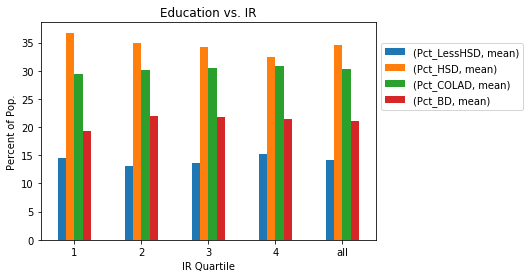

In [76]:
xtags = ["Qrt.1","Qrt.2","Qrt.3","Qrt.4","All"]
## ax = df2.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Video streaming dropout by category')
ax = IR_ave_quartile[[("Pct_LessHSD","mean"),("Pct_HSD","mean"),("Pct_COLAD","mean"),("Pct_BD","mean")]].plot(kind='bar',title='Education vs. IR', rot=0)
ax.set_xlabel("IR Quartile")
ax.set_ylabel("Percent of Pop.")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))

#### Lower quartiles indicates a lower cancer rates. Educational level of the population by county follow the same basic profile in each quartile, suggesting the affect of education on cancer rate is small, if present at all.  An interesting pattern occurs in the high school attainment group.  The incident rate for high school graduates is shifted away from quartliles 4 and 5, into quartile 1.  The significance of this shift is not analyzed here. 

##### Now let's consider the employment/ unemployment rate.  We first need to compute a 5-year rate (2012-2016).

In [77]:
cbcreduced["Civilian_labor_force_2016"] = cbcreduced["Civilian_labor_force_2016"].str.replace(',','').astype(int)


In [78]:
cbcreduced["Civilian_labor_force_2016"]

0       158708795
1            4792
2             482
3            4956
4           12213
5             804
6            3217
7             265
8            2740
9            5238
10           5179
11            379
12            447
13           1714
14           4966
15           2968
16           3423
17           8553
18          11453
19           3866
20           5042
21          14402
22           9939
23          17388
24            527
25           1120
26           1769
27           9881
28           3829
29           1918
          ...    
2899         1792
2900         1893
2901         1652
2902         6706
2903         5745
2904          401
2905        20320
2906         1072
2907         6853
2908         9412
2909         1684
2910         8434
2911         1043
2912         7438
2913          670
2914         1157
2915          919
2916         1204
2917         1542
2918          513
2919          589
2920        21150
2921         1074
2922         1096
2923      

In [79]:
# Civilian_labor_force_2013
# Employed_2013
# Unemployed_2013
# Unemployment_rate_2013
cbcreduced["Civilian_labor_force_2015"] = cbcreduced["Civilian_labor_force_2015"].str.replace(',','').astype(int)
cbcreduced["Civilian_labor_force_2014"] = cbcreduced["Civilian_labor_force_2014"].str.replace(',','').astype(int)
cbcreduced["Civilian_labor_force_2013"] = cbcreduced["Civilian_labor_force_2013"].str.replace(',','').astype(int)
cbcreduced["Civilian_labor_force_2012"] = cbcreduced["Civilian_labor_force_2012"].str.replace(',','').astype(int)

In [80]:
cbcreduced["Unemployed_2016"] = cbcreduced["Unemployed_2016"].str.replace(',','').astype(int)
cbcreduced["Unemployed_2015"] = cbcreduced["Unemployed_2015"].str.replace(',','').astype(int)
cbcreduced["Unemployed_2014"] = cbcreduced["Unemployed_2014"].str.replace(',','').astype(int)
cbcreduced["Unemployed_2013"] = cbcreduced["Unemployed_2013"].str.replace(',','').astype(int)
cbcreduced["Unemployed_2012"] = cbcreduced["Unemployed_2012"].str.replace(',','').astype(int)

In [81]:
# Calculate the unemployment rate average from 2012-2016
total_labor_force = cbcreduced["Civilian_labor_force_2016"] + cbcreduced["Civilian_labor_force_2015"] + cbcreduced["Civilian_labor_force_2014"] + cbcreduced["Civilian_labor_force_2013"] + cbcreduced["Civilian_labor_force_2012"]
total_unemployed = cbcreduced["Unemployed_2016"] + cbcreduced["Unemployed_2015"] + cbcreduced["Unemployed_2014"] + cbcreduced["Unemployed_2013"] + cbcreduced["Unemployed_2012"]
cbcreduced["Unemployment_rate_ave"] = total_unemployed/total_labor_force
cbcreduced["Unemployment_rate_ave"].head(10)

0    0.063442
1    0.057684
2    0.029875
3    0.089150
4    0.075245
5    0.084066
6    0.073807
7    0.047689
8    0.030815
9    0.079277
Name: Unemployment_rate_ave, dtype: float64

In [82]:
cbcreduced["Unemployment_rate_ave"].describe()

count    2929.000000
mean        0.065715
std         0.022265
min         0.017589
25%         0.050432
50%         0.063779
75%         0.077865
max         0.250255
Name: Unemployment_rate_ave, dtype: float64

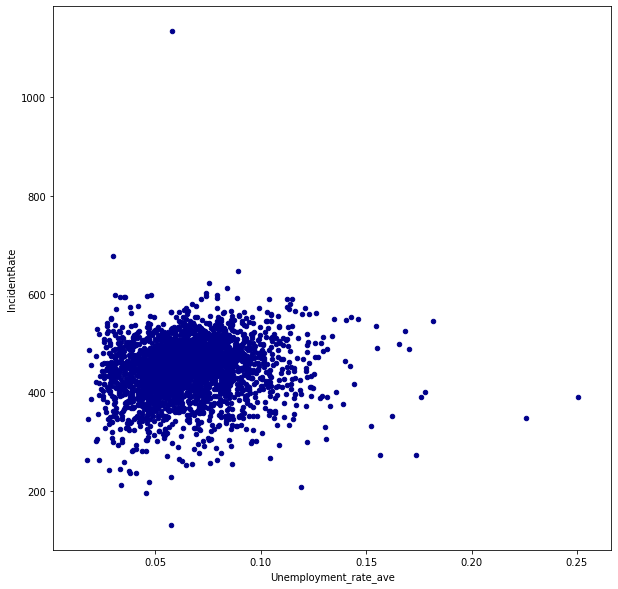

In [83]:
# show the association between the average unemployment rate and the incindence of cancer
ax1 = cbcreduced.plot.scatter(x= "Unemployment_rate_ave",
                      y= "IncidentRate",
                      c='DarkBlue', figsize=(10,10))

#### The distribution of Incident Rate over the Unemployment rate looks to have a slighly positive correlation

In [84]:
corr_list = cbcreduced[["Unemployment_rate_ave","IncidentRate"]]
print(corr_list.head(5))

   Unemployment_rate_ave  IncidentRate
0               0.063442         448.0
1               0.057684        1135.0
2               0.029875         677.2
3               0.089150         646.2
4               0.075245         623.3


In [85]:
corr_list.corr()

,Unemployment_rate_ave,IncidentRate
Unemployment_rate_ave,1.000000,0.118902
IncidentRate,0.118902,1.000000


####  We see a slightly positive correlation.  Why might we suspect that unemployment and cancer incidence might be related? Chronic stress has been identified as a possible risk factor and trigger for cancer.  Becoming and being unemployed is a highly stress inducing event in a person's life.  Of course, other mechanisms could be at work, including random fluctuations.
##### Now let's consider the overall poverty rate vs. cancer incidence.

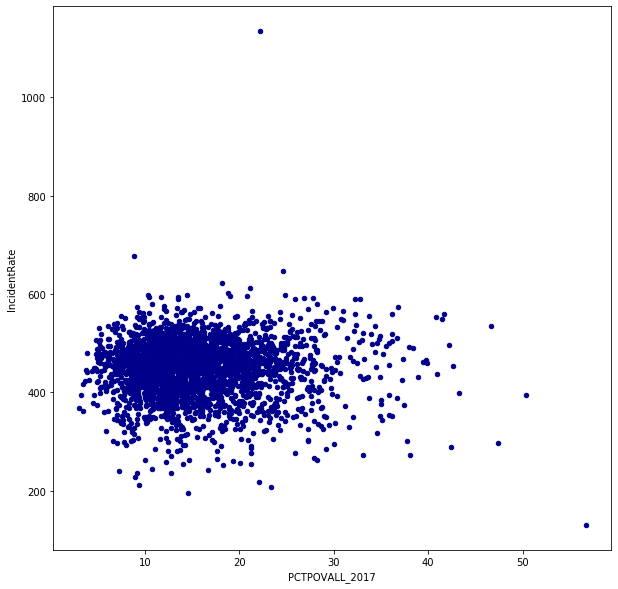

In [86]:
ax1 = cbcreduced.plot.scatter(x= "PCTPOVALL_2017",
                      y= "IncidentRate",
                      c='DarkBlue', figsize=(10,10))

####  The Incident Rate over poverty distribution seems random, with little positive or negative slope.  Like employment, one would expect much chronic stress associated with this condition of living. If that mechanism is at play here and is significant, we would expect a positive relationship.

In [87]:
corr_list = cbcreduced[["PCTPOVALL_2017","IncidentRate"]]
print(corr_list.head(5))

   PCTPOVALL_2017  IncidentRate
0            13.4         448.0
1            22.2        1135.0
2             8.9         677.2
3            24.6         646.2
4            18.2         623.3


In [88]:
corr_list.corr()

,PCTPOVALL_2017,IncidentRate
PCTPOVALL_2017,1.000000,0.002124
IncidentRate,0.002124,1.000000


#### We see little association between the rate of poverty and the cancer incidence here. 
##### Also, we should check the other poverty subsets to see if they can be included in a correlation heatmap.

In [89]:
cbcreduced[["PCTPOVALL_2017","PCTPOV017_2017","PCTPOV517_2017","PCTPOV04_2017"]].head()

,PCTPOVALL_2017,PCTPOV017_2017,PCTPOV517_2017,PCTPOV04_2017
0,13.4,18.4,17.3,20.2
1,22.2,23.0,22.0,NaN
2,8.9,13.0,12.9,NaN
3,24.6,35.0,32.5,NaN
4,18.2,25.6,24.8,NaN


#### We should exclude the PCTPOV04 subset because of missing data.
##### Let's examine population change vs. cancer rate.  We need to calculate the net population change for the 2012-2016 interval.

In [90]:
cbcreduced[["POP_ESTIMATE_2011","Pop_Chg_2012","Pop_Chg_2013","Pop_Chg_2014","Pop_Chg_2015","Pop_Chg_2016"]].head(5)

,POP_ESTIMATE_2011,Pop_Chg_2012,Pop_Chg_2013,Pop_Chg_2014,Pop_Chg_2015,Pop_Chg_2016
0,"311,580,009","2,294,209","2,183,509","2,328,694","2,356,252","2,328,669"
1,"15,299",-41,-96,98,14,-22
2,779,6,-8,-10,23,-1
3,"12,621",-142,-1,-122,-128,29
4,"24,985",86,91,200,221,-141


In [91]:
# The current format of these counts need additional data scrubbing.
Net_Pop_Chg = cbcreduced["Pop_Chg_2012"] + cbcreduced["Pop_Chg_2013"] + cbcreduced["Pop_Chg_2014"] + cbcreduced["Pop_Chg_2015"]+ cbcreduced["Pop_Chg_2016"]
# cbcreduced["Pct_Pop_Chg"]
print(Net_Pop_Chg.head(5))

0    2,294,2092,183,5092,328,6942,356,2522,328,669
1                                    -41-969814-22
2                                       6-8-1023-1
3                                 -142-1-122-12829
4                                   8691200221-141
dtype: object


In [92]:
# extractFloat(string) returns the first occurance of a whitespace-delimited floating point number. if the string
#    has more than one number, only the first will be returned. If the string does not contain a number, the string 
#    itself will be returned unmodified.

def Extract_Int(string):
    strlist = string.split()
    for str in strlist:
        str = str.replace(",","")
        try:
            int(str)
            return str
        except ValueError:
            pass
    return string


In [93]:
cbcreduced["Pop_Estimate"] = cbcreduced["POP_ESTIMATE_2011"].apply(Extract_Int)
cbcreduced["Pop_Estimate"] = pd.to_numeric(cbcreduced["Pop_Estimate"], errors='coerce')
cbcreduced["Popchg_2012"] = cbcreduced["Pop_Chg_2012"].apply(Extract_Int)
cbcreduced["Popchg_2012"] = pd.to_numeric(cbcreduced["Popchg_2012"], errors='coerce')
cbcreduced["Popchg_2013"] = cbcreduced["Pop_Chg_2013"].apply(Extract_Int)
cbcreduced["Popchg_2013"] = pd.to_numeric(cbcreduced["Popchg_2013"], errors='coerce')
cbcreduced["Popchg_2014"] = cbcreduced["Pop_Chg_2014"].apply(Extract_Int)
cbcreduced["Popchg_2014"] = pd.to_numeric(cbcreduced["Popchg_2014"], errors='coerce')
cbcreduced["Popchg_2015"] = cbcreduced["Pop_Chg_2015"].apply(Extract_Int)
cbcreduced["Popchg_2015"] = pd.to_numeric(cbcreduced["Popchg_2015"], errors='coerce')
cbcreduced["Popchg_2016"] = cbcreduced["Pop_Chg_2016"].apply(Extract_Int)
cbcreduced["Popchg_2016"] = pd.to_numeric(cbcreduced["Popchg_2016"], errors='coerce')
print(cbcreduced["Pop_Estimate"].head(10))
print(cbcreduced["Popchg_2012"].head(10))
print(cbcreduced["Popchg_2013"].head(10))
print(cbcreduced["Popchg_2014"].head(10))
print(cbcreduced["Popchg_2015"].head(10))
print(cbcreduced["Popchg_2016"].head(10))

0    311580009
1        15299
2          779
3        12621
4        24985
5         2290
6         7088
7          475
8         5170
9        14655
Name: Pop_Estimate, dtype: int64
0    2294209
1        -41
2          6
3       -142
4         86
5        -74
6        -78
7         23
8         61
9       -149
Name: Popchg_2012, dtype: int64
0    2183509
1        -96
2         -8
3         -1
4         91
5          0
6         -1
7        -28
8       -165
9        -20
Name: Popchg_2013, dtype: int64
0    2328694
1         98
2        -10
3       -122
4        200
5        -29
6         42
7         20
8        -13
9        -41
Name: Popchg_2014, dtype: int64
0    2356252
1         14
2         23
3       -128
4        221
5        -52
6         10
7        -13
8       -100
9        -68
Name: Popchg_2015, dtype: int64
0    2328669
1        -22
2         -1
3         29
4       -141
5        -10
6         22
7         -7
8         18
9        -59
Name: Popchg_2016, dtype: int64


In [94]:
Net_Pop_Chg = cbcreduced["Popchg_2012"] + cbcreduced["Popchg_2013"] + cbcreduced["Popchg_2014"] + cbcreduced["Popchg_2015"]+ cbcreduced["Popchg_2016"]
cbcreduced["Pop_Change_Pct"] = Net_Pop_Chg/cbcreduced["Pop_Estimate"]
print(Net_Pop_Chg.head(5))
print(cbcreduced["Pop_Change_Pct"].head(5))

0    11491333
1         -47
2          10
3        -364
4         457
dtype: int64
0    0.036881
1   -0.003072
2    0.012837
3   -0.028841
4    0.018291
Name: Pop_Change_Pct, dtype: float64


In [95]:
# We select fields that are suitable for correlation
corr_list = ["IncidentRate","Pop_Change_Pct","Pop_Estimate","Unemployment_rate_ave",
             "Pct_LessHSD","Pct_HSD","Pct_COLAD","Pct_BD",
             "PCTPOVALL_2017","PCTPOV017_2017","PCTPOV517_2017",
             "Recent 5-yr Trend"
            ]  

In [96]:
cbcreduced[corr_list]

,IncidentRate,Pop_Change_Pct,Pop_Estimate,Unemployment_rate_ave,Pct_LessHSD,Pct_HSD,Pct_COLAD,Pct_BD,PCTPOVALL_2017,PCTPOV017_2017,PCTPOV517_2017,Recent 5-yr Trend
0,448.0,0.036881,311580009,0.063442,12.7,27.3,29.1,30.9,13.4,18.4,17.3,-0 .9
1,1135.0,-0.003072,15299,0.057684,24.1,37.7,30.0,8.3,22.2,23.0,22.0,-4.6
2,677.2,0.012837,779,0.029875,7.5,27.7,42.2,22.7,8.9,13.0,12.9,1.2
3,646.2,-0.028841,12621,0.089150,21.1,43.5,22.0,13.4,24.6,35.0,32.5,1.1
4,623.3,0.018291,24985,0.075245,15.8,39.0,26.4,18.8,18.2,25.6,24.8,1.4
5,611.6,-0.072052,2290,0.084066,25.3,33.4,24.0,17.2,21.1,29.2,26.1,2.2
6,603.0,-0.000705,7088,0.073807,20.6,43.8,25.2,10.4,18.8,27.6,27.3,1.4
7,598.0,-0.010526,475,0.047689,1.1,37.4,37.4,24.2,14.5,21.4,21.4,7.8
8,597.8,-0.038491,5170,0.030815,9.3,37.0,31.5,22.2,10.3,12.9,13.3,0.6
9,597.4,-0.022996,14655,0.079277,24.0,46.7,19.4,9.9,24.8,29.8,28.1,-7.8


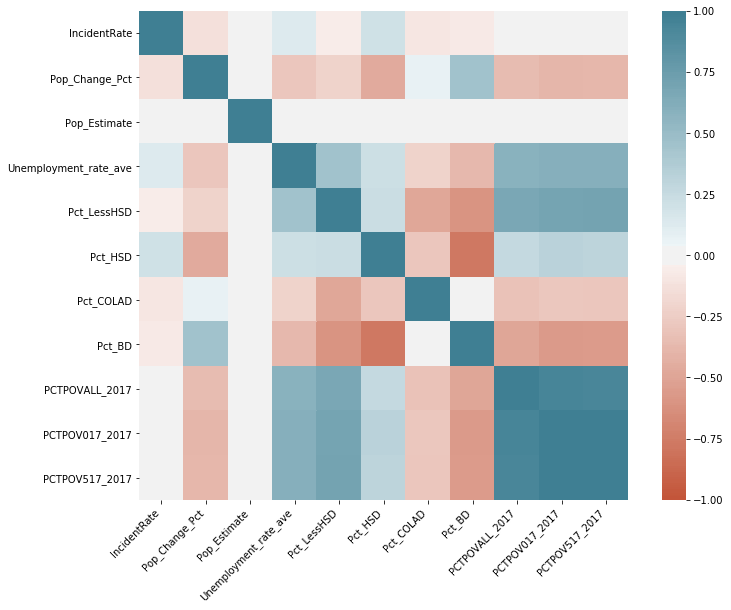

In [97]:
corr = cbcreduced[corr_list].corr()
plt.subplots(figsize=(12,9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Three features show slight associations the cancer incident rate by county: population change, the unemployment rate, the category of high school graduates (as the highest attainment).   Of course, increasing age is highly correlated with increased incidence rate of cancer, but, recall, the rate is already age-adjusted.
#### Population change is negatively correlated; it suggests declining populations are associated with increased cancer rates (but not necessarily all attributable to cancer deaths!).  Counties with higher unemployment and higher rates of people graduating high school (but not going to college) are positively correlated with higher rates of cancer.  Nonetheless, these associations are weak in this dataset.
#### As we might expect, the heatmap shows stronger correlations between other demographic features (and co-variance in certain features.)  For example, counties where achieving a bachelor degree or higher are associated with lower unemployment rates and growing populations. 
#### In terms of building a useful model, a next step might be to obtain granular data at level of individual cases.